<a href="https://colab.research.google.com/github/AllanBottino/Store_Item_Demand_Forecasting_Challenge_Analise_Basica/blob/main/An%C3%A1lise_SIDC_B%C3%A1sica_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1- Importando as bibliotecas:

In [101]:
import pandas as pd

import warnings

import numpy as np

import seaborn as sns

import plotly.express as px

import matplotlib.pyplot as plt 


# O comando abaixo tira umas mensagens chatas.

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Vamos carregar os dois arquivos:

#train=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_train.csv")
#test=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_test.csv")

from google.colab import files
uploaded = files.upload()

Saving store_item_demand_test.csv to store_item_demand_test (1).csv
Saving store_item_demand_train.csv to store_item_demand_train (1).csv


In [4]:
# caso precise importar pelo google colab aqui está como fazer:

import io

train = pd.read_csv(io.BytesIO(uploaded['store_item_demand_train.csv'])) 
test = pd.read_csv(io.BytesIO(uploaded['store_item_demand_test.csv']))

In [5]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [6]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [7]:
train.shape # 70% do dataframe original está aqui.

(913000, 4)

In [8]:
test.shape # 30% do dataframe original está aqui.

(45000, 4)

In [9]:
# Vamos concatenar o dataframe "train" e "test", e  criar um só com os dois.

df = pd.concat([train,test])

# ,sort=True,ignore_index=True


In [10]:
df.info() # Aqui podemos ver os tipos de arquivos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    958000 non-null  object 
 1   store   958000 non-null  int64  
 2   item    958000 non-null  int64  
 3   sales   913000 non-null  float64
 4   id      45000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 43.9+ MB


In [11]:
df.describe()

,store,item,sales,id
count,958000.000000,958000.000000,913000.000000,45000.000000
mean,5.500000,25.500000,52.250287,22499.500000
std,2.872283,14.430877,28.801144,12990.525394
min,1.000000,1.000000,0.000000,0.000000
25%,3.000000,13.000000,30.000000,11249.750000
50%,5.500000,25.500000,47.000000,22499.500000
75%,8.000000,38.000000,70.000000,33749.250000
max,10.000000,50.000000,231.000000,44999.000000


2- Vendo se há arquivos faltantes:

In [12]:
df.isnull().sum()

date          0
store         0
item          0
sales     45000
id       913000
dtype: int64

Acima pode se ver que temos 4500 faltando em sales e 91300 em id, eu já olhei o arquivo bastante e isso se deve ao ano de 2018, nele está faltando bastante coisa do ano de 2018 (mais para frente dará para ver) e a coluna id está totalmente vazia.

3 - Criando novas variáveis:

In [13]:
# Vou separar a coluna date em várias variáveis em formato de data para poder ver as vendas em em datas diferentes:

df['date'] = pd.to_datetime(df['date']) # Primeiramente transformamos a coluna "date" e a convertemos para o formato "datetime"
                                        # e só depois podemos criar as variáveis de "ano", "mes", "semana" e etc.

df['year'] = df.date.dt.year   # Criaremos com a função .dt.year a coluna "ano" contendo todos os anos.
df['month'] = df.date.dt.month # Criaremos com a função .dt.month a coluna "month" contendo os meses dentro de dataframe.
df['week'] = df.date.dt.week# Criaremos com a função .dt.week a coluna "week" contendo as semanas dentro do dataframe.
df['weekday'] = df.date.dt.weekday # Criaremos com a função dt.weekday a coluna "weekday" contendo os dias da
                                   # semana dentro do dataframe.

df["day"] = df.date.dt.day      # Criaremos com a função .dt.day a coluna "day" contendo os dias dentro do dataframe.

#df['daysinmonth'] = df.date.dt.daysinmonth
#df['dayofweek'] = df.date.dt.dayofweek

df.head(1)

,date,store,item,sales,id,year,month,week,weekday,day
0,2013-01-01,1,1,13.0,NaN,2013,1,1,1,1


Abaixo também criarei uma variável para cada data, e dentro deste ano criado, o pandas irá criar um dataframe com tudo relacionado ao ano de 2013, que é uma excelente coisa pois me ajudará ao usar o pivot_tables para mostrar os dados.



In [14]:
df_2013 = df.loc[df["date"].between('2013-01-01', '2013-12-31')] # Aqui eu vou delimitar onde a data começa e onde termina.

df_2013['date'] = pd.to_datetime(df_2013['date']) # Aqui convertemos a coluna "date" para o formato datetime.

# E dentro do df_2013 criaremos novas colunas com as divisões "year", "month", "week" e etc.

df_2013['month'] = df_2013.date.dt.month 
df_2013['week'] = df_2013.date.dt.week
df_2013['weekday'] = df_2013.date.dt.weekday
df_2013["day"] = df_2013.date.dt.day      

#df_2013['dayofyear'] = df_2013.date.dt.dayofyear #
#df_2013['daysinmonth'] = df_2013.date.dt.daysinmonth
#df_2013['dayofweek'] = df_2013.date.dt.dayofweek

df_2013.head(1)

,date,store,item,sales,id,year,month,week,weekday,day
0,2013-01-01,1,1,13.0,NaN,2013,1,1,1,1


In [15]:
df_2014 = df.loc[df["date"].between('2014-01-01', '2014-12-31')]

df_2014['date'] = pd.to_datetime(df_2014['date']) 


df_2014['year'] = df_2014.date.dt.year   
df_2014['month'] = df_2014.date.dt.month
df_2014['week'] = df_2014.date.dt.week
df_2014['weekday'] = df_2014.date.dt.weekday
df_2014["day"] = df_2014.date.dt.day     

#df_2014['dayofyear'] = df_2014.date.dt.dayofyear 
#df_2014['daysinmonth'] = df_2014.date.dt.daysinmonth
#df_2014['dayofweek'] = df_2014.date.dt.dayofweek

df_2014.head(1)

,date,store,item,sales,id,year,month,week,weekday,day
365,2014-01-01,1,1,9.0,NaN,2014,1,1,2,1


In [16]:
df_2015 = df.loc[df["date"].between('2015-01-01', '2015-12-31')]

df_2015['date'] = pd.to_datetime(df_2015['date']) 


df_2015['year'] = df_2015.date.dt.year   
df_2015['month'] = df_2015.date.dt.month
df_2015['week'] = df_2015.date.dt.week
df_2015['weekday'] = df_2015.date.dt.weekday
df_2015["day"] = df_2015.date.dt.day     

#df_2015['dayofyear'] = df_2015.date.dt.dayofyear 
#df_2015['daysinmonth'] = df_2015.date.dt.daysinmonth
#df_2015['dayofweek'] = df_2015.date.dt.dayofweek

df_2015.head(1)

,date,store,item,sales,id,year,month,week,weekday,day
730,2015-01-01,1,1,11.0,NaN,2015,1,1,3,1


In [17]:
df_2016 = df.loc[df["date"].between('2016-01-01', '2016-12-31')]

df_2016['date'] = pd.to_datetime(df_2016['date']) 


df_2016['year'] = df_2016.date.dt.year   
df_2016['month'] = df_2016.date.dt.month
df_2016['week'] = df_2016.date.dt.week
df_2016['weekday'] = df_2016.date.dt.weekday
df_2016["day"] = df_2016.date.dt.day     

#df_2016['dayofyear'] = df_2016.date.dt.dayofyear 
#df_2016['daysinmonth'] = df_2016.date.dt.daysinmonth
#df_2016['dayofweek'] = df_2016.date.dt.dayofweek

df_2016.head(1)

,date,store,item,sales,id,year,month,week,weekday,day
1095,2016-01-01,1,1,21.0,NaN,2016,1,53,4,1


In [18]:
df_2017 = df.loc[df["date"].between('2017-01-01', '2017-12-31')]

df_2017['date'] = pd.to_datetime(df_2017['date']) 


df_2017['year'] = df_2017.date.dt.year   
df_2017['month'] = df_2017.date.dt.month
df_2017['week'] = df_2017.date.dt.week
df_2017['weekday'] = df_2017.date.dt.weekday
df_2017["day"] = df_2017.date.dt.day     

#df_2017['dayofyear'] = df_2017.date.dt.dayofyear 
#df_2017['daysinmonth'] = df_2017.date.dt.daysinmonth
#df_2017['dayofweek'] = df_2017.date.dt.dayofweek

df_2017.head(1)

,date,store,item,sales,id,year,month,week,weekday,day
1461,2017-01-01,1,1,19.0,NaN,2017,1,52,6,1


In [19]:
# O ano de 2018 tem muitos dados faltantes na coluna sales, mas eu vou deixar mesmo assim.
df_2018 = df.loc[df["date"].between('2018-01-01', '2018-12-31')]

df_2018['date'] = pd.to_datetime(df_2018['date']) 


df_2018['year'] = df_2018.date.dt.year   
df_2018['month'] = df_2018.date.dt.month
df_2018['week'] = df_2018.date.dt.week
df_2018['weekday'] = df_2018.date.dt.weekday
df_2018["day"] = df_2018.date.dt.day     

df_2018['dayofyear'] = df_2018.date.dt.dayofyear 
df_2018['daysinmonth'] = df_2018.date.dt.daysinmonth
df_2018['dayofweek'] = df_2018.date.dt.dayofweek

df_2018.head(1)

,date,store,item,sales,id,year,month,week,weekday,day,dayofyear,daysinmonth,dayofweek
0,2018-01-01,1,1,NaN,0.0,2018,1,1,0,1,1,31,0


# Agora eu vou separar Loja por loja (store) assim como eu fiz com as datas:


In [20]:
#Nessa primeira parte eu crio para cada loja um dataframe diferente, tudo que é relacionado ao store 1 estará dentro de
# "store_1" e assim também com os outros.

store_1 = df[df.store == 1]['sales']#.sort_index(ascending=False)
store_2 = df[df.store == 2]['sales']#.sort_index(ascending=False)
store_3 = df[df.store == 3]['sales']#.sort_index(ascending=False)
store_4 = df[df.store == 4]['sales']#.sort_index(ascending=False)
store_5 = df[df.store == 5]['sales']#.sort_index(ascending=False)
store_6 = df[df.store == 6]['sales']#.sort_index(ascending=False)
store_7 = df[df.store == 7]['sales']#.sort_index(ascending=False)
store_8 = df[df.store == 8]['sales']#.sort_index(ascending=False)
store_9 = df[df.store == 9]['sales']#.sort_index(ascending=False)
store_10 = df[df.store == 10]['sales']#.sort_index(ascending=False)

# Nessa segunda parte vou inserir dentro do dataframe.

df.insert(loc=2, column="store_1", value="store_1")
df.insert(loc=3, column="store_2", value="store_2")
df.insert(loc=4, column="store_3", value="store_3")
df.insert(loc=5, column="store_4", value="store_4")
df.insert(loc=6, column="store_5", value="store_5")
df.insert(loc=7, column="store_6", value="store_6")
df.insert(loc=8, column="store_7", value="store_7")
df.insert(loc=9, column="store_8", value="store_8")
df.insert(loc=10, column="store_9", value="store_9")
df.insert(loc=11, column="store_10", value="store_10")

df.head(1)

,date,store,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,item,sales,id,year,month,week,weekday,day
0,2013-01-01,1,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,1,13.0,NaN,2013,1,1,1,1


In [21]:
# Teste da store_1:

store_1_sales_by_year = pd.pivot_table(df, index = "year", columns=["item"], values = "sales")
store_1_sales_by_year.head()

item,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013,18.280274,48.793425,30.523836,18.440822,15.238630,48.773151,48.876712,63.952055,42.823014,60.841370,58.076164,58.157260,70.154521,48.909863,73.295616,21.371233,27.593973,70.296712,33.591233,39.514247,33.725205,67.158630,24.329041,55.156438,67.000548,39.570137,18.362192,73.192329,57.940548,33.578630,48.848493,36.553425,57.900822,21.325479,54.772603,64.015342,24.220274,67.200000,36.496712,24.345753,18.283562,30.580274,42.785753,24.590137,67.050685,48.993151,18.298082,42.681918,24.293973,54.928767
2014,21.034795,56.112055,35.042192,21.104110,17.498356,56.087397,55.995068,73.784110,49.195616,70.114247,66.524384,66.648219,80.819452,56.068219,84.410411,24.557534,31.628219,80.704110,38.678630,45.480548,38.584932,77.158356,28.011233,63.123562,77.452603,45.775616,21.153699,84.386575,66.715068,38.613151,56.207123,42.231781,66.724110,24.689315,63.075616,73.892329,28.157260,77.035890,41.957808,28.014795,21.021644,35.188493,49.049315,28.174521,77.086301,56.138630,21.069589,49.272055,28.208219,63.214521
2015,22.056712,58.574795,36.761096,22.071233,18.326027,58.377808,58.613425,76.911233,51.626575,73.087671,69.536438,69.730137,84.266027,58.728767,88.073699,25.695890,32.945753,84.146301,40.232055,47.656438,40.212603,80.493151,29.237534,66.123288,80.665205,47.548219,22.027123,87.841644,69.612055,40.401096,58.709589,44.095068,69.648493,25.834521,65.786575,77.140548,29.245479,80.486027,43.873973,29.046301,22.075616,36.835068,51.231507,29.398630,80.620548,58.514795,21.986849,51.373973,29.498356,65.863836
2016,23.831694,63.508197,39.560383,23.831967,19.957104,63.516940,63.392623,83.260656,55.567486,79.375410,75.530874,75.312842,91.374317,63.628142,95.289617,27.754918,35.838251,91.295355,43.734153,51.475683,43.661749,87.300000,31.837705,71.575956,87.668306,51.669126,23.943716,95.125683,75.326503,43.708743,63.520219,47.366940,75.159836,27.840164,71.221311,83.450000,31.674317,87.183060,47.629781,31.819945,23.821311,39.702459,55.513934,31.803005,87.245628,63.639617,23.813388,55.516667,31.616667,71.432787
2017,24.699452,65.868767,41.315616,24.598082,20.769041,65.750411,65.764110,86.824932,57.725205,82.701644,78.597808,78.310685,94.949315,66.060822,99.064658,28.895068,36.960274,94.917260,45.532329,53.441918,45.391781,90.382466,33.066849,74.228767,90.626301,53.646301,24.756712,98.840548,78.484384,45.374247,65.922740,49.652329,78.356164,28.983562,74.138082,86.628767,32.987945,90.686301,49.448493,33.013151,24.803562,41.126027,57.879726,33.018082,90.899452,65.899452,24.843836,57.908219,33.053151,73.955890


# #**4** - Visualizando os dados:¶

## Primeiro vamos ver os dados vendas em relação aos anos:

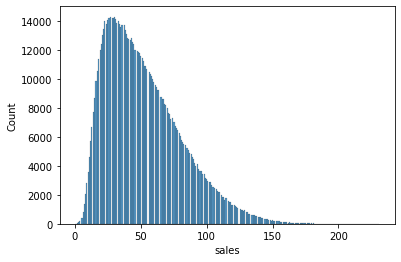

In [51]:
sns.histplot(df.sales)

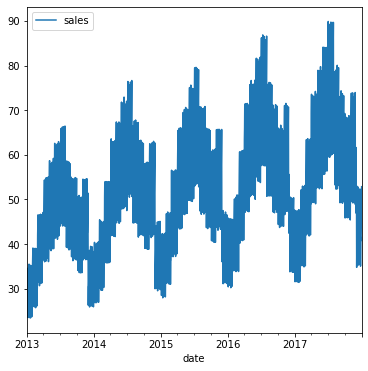

In [33]:
sales_year = pd.pivot_table(df, index = "date", values = "sales")
sales_year.plot(figsize=(6,6))

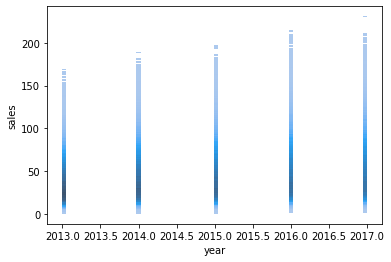

In [50]:
sns.histplot(data = df, x= "year", y = "sales")

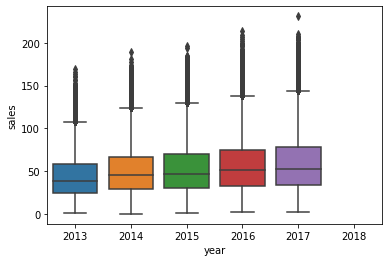

In [53]:
sns.boxplot(data = df, x= "year", y = "sales") 

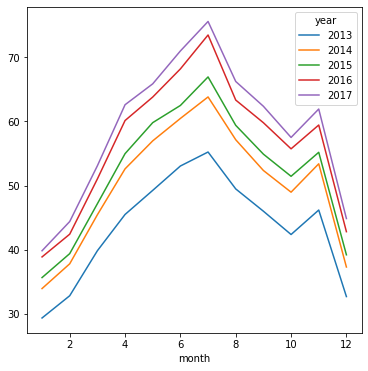

In [54]:
sales_year = pd.pivot_table(df, values='sales', columns = ['year'], index='month')
sales_year.plot(figsize=(6,6))

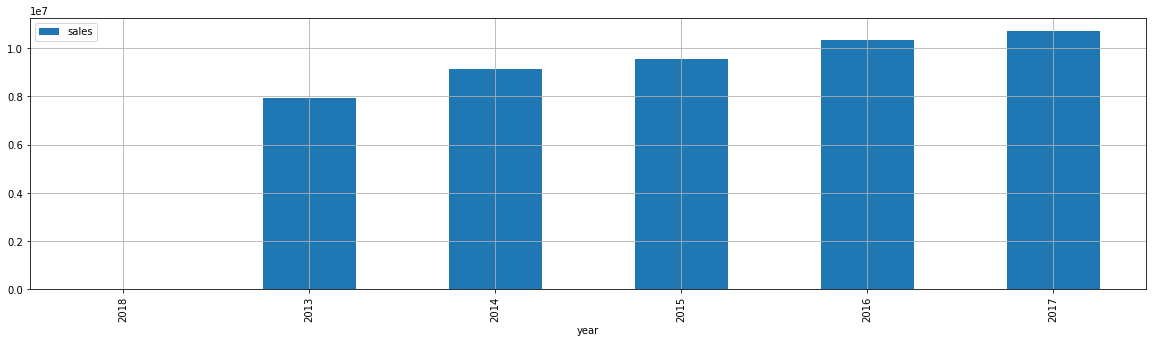

In [59]:
df_year_sales = df.groupby('year').agg({'sales': 'sum'}).sort_values(by='sales', ascending=True)

df_year_sales.plot(kind="bar",legend="Sum", figsize=(20,5)).grid()

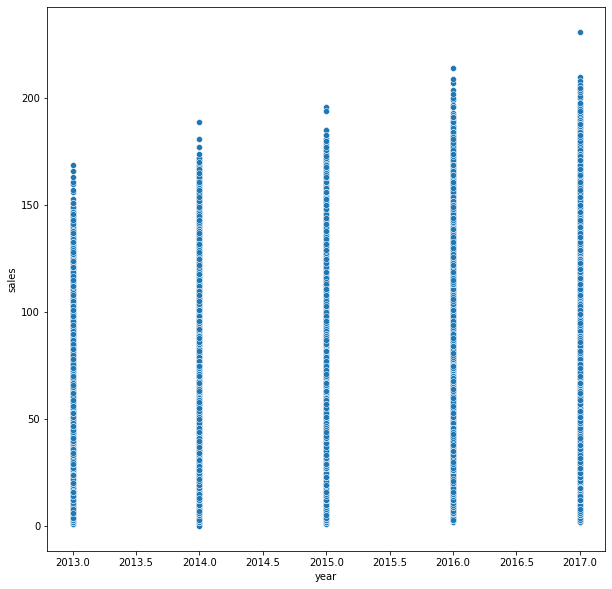

In [97]:
sns.scatterplot(data = df, x='year', y = 'sales') 

In [60]:
df_year_sales_top = df.groupby('year').agg({'sales': 'sum'}).sort_values(by='sales', ascending=False)

df_year_sales_top.head(5)

,sales
year,
2017,10733740.0
2016,10357160.0
2015,9536887.0
2014,9135482.0
2013,7941243.0


Acima podemos ver que o ano de 2017 foi o que mais vendeu, e o de 2013 o que menos vendeu.

Agora vamos ver as vendas ao longo dos meses:

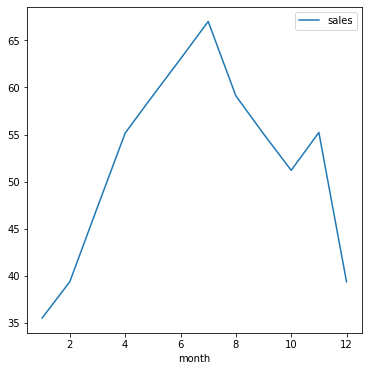

In [61]:
sales_month = pd.pivot_table(df, index = "month", values = "sales")
sales_month.plot(figsize=(6,6))

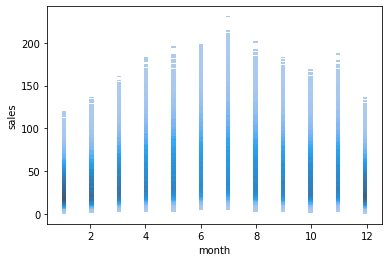

In [62]:
sns.histplot(data = df, x= "month", y = "sales")

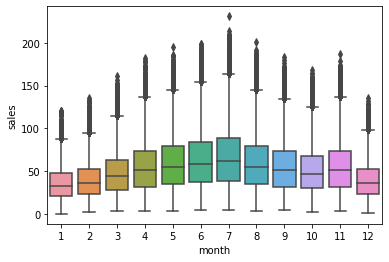

In [63]:
sns.boxplot(data = df, x= "month", y = "sales") 

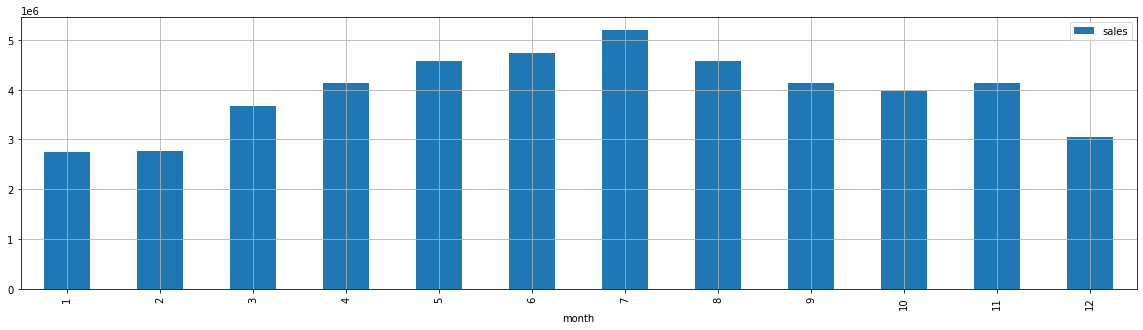

In [65]:
df_month_sales = df.groupby('month').agg({'sales': 'sum'}) #.sort_values(by='sales', ascending=True)

df_month_sales.plot(kind="bar",legend="Sum", figsize=(20,5)).grid()

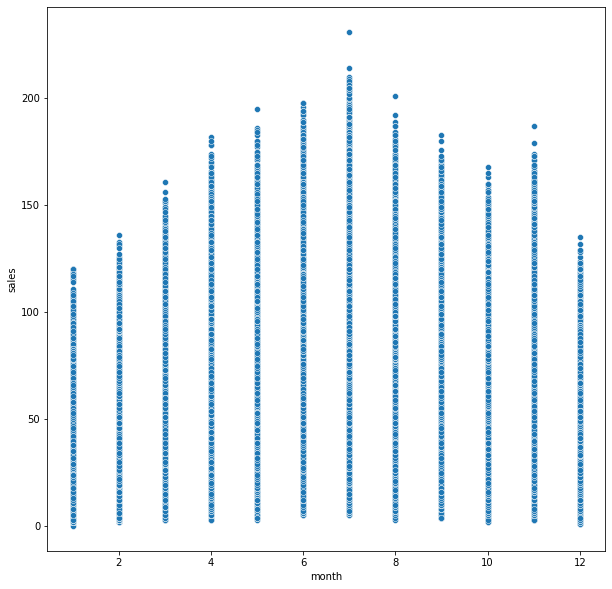

In [98]:
sns.scatterplot(data = df, x='month', y = 'sales') 

In [67]:
df_month_sales_top = df.groupby('month').agg({'sales': 'sum'}).sort_values(by='sales', ascending=False)

df_month_sales_top.head(12)

,sales
month,
7,5192393.0
6,4726911.0
5,4582437.0
8,4580655.0
11,4141356.0
4,4136467.0
9,4130457.0
10,3967520.0
3,3666182.0


# #Acima se pode ver bem que os meses 6 e 7 as vendas atingem o seu máximo e depois começam a cair sendo o pior resultado no começo do ano.

Agora vamos ver as vendas em relação os dias da semana:

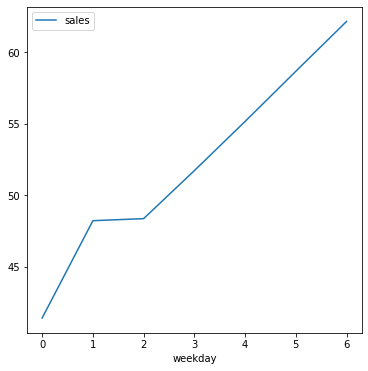

In [68]:
sales_weekday = pd.pivot_table(df, index = "weekday", values = "sales")
sales_weekday.plot(figsize=(6,6))

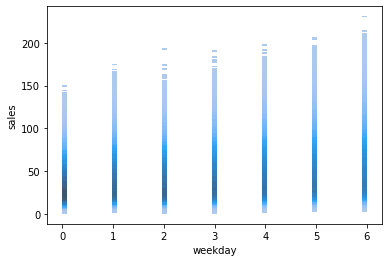

In [69]:
sns.histplot(data = df, x= "weekday", y = "sales")

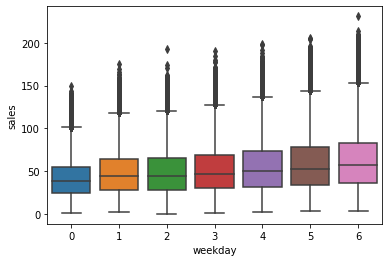

In [70]:
sns.boxplot(data = df, x= "weekday", y = "sales") 

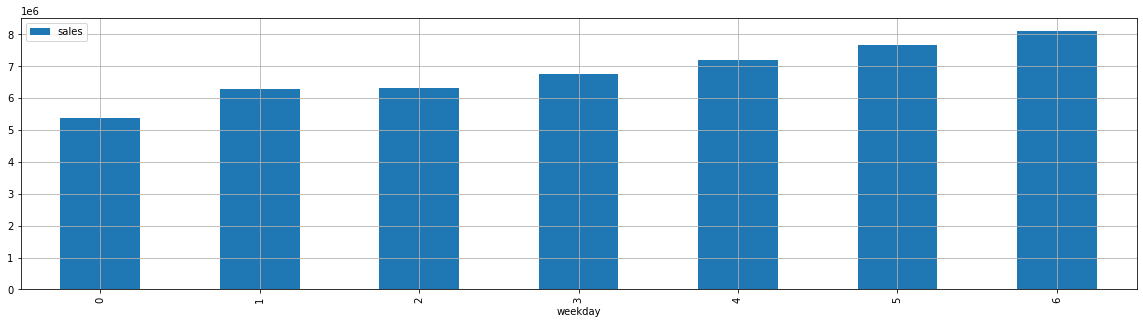

In [71]:
df_weekday_sales = df.groupby('weekday').agg({'sales': 'sum'}) #.sort_values(by='sales', ascending=True)

df_weekday_sales.plot(kind="bar",legend="Sum", figsize=(20,5)).grid()

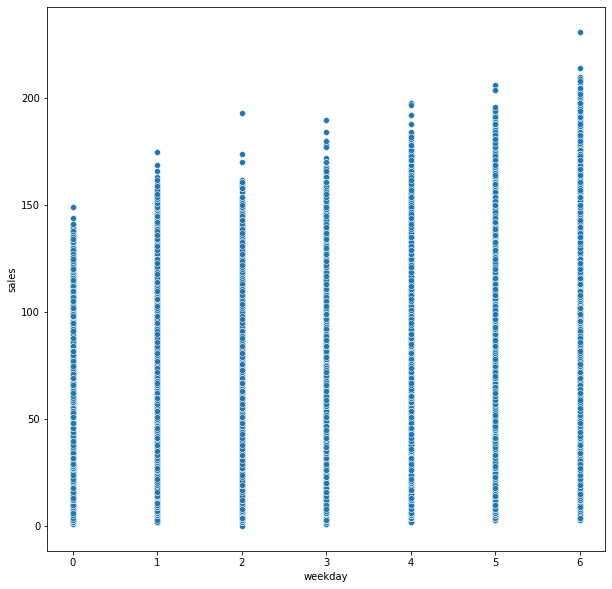

In [99]:
sns.scatterplot(data = df, x='weekday', y = 'sales') 

In [100]:
df_top_sales_weekday = df.groupby('weekday').agg({'sales': 'max'}).sort_values(by='sales', ascending=False)

df_top_sales_weekday.head(7)

,sales
weekday,
6,231.0
5,206.0
4,198.0
2,193.0
3,190.0
1,175.0
0,149.0


Podemos ver que domingo (0) são as piores vendas e que ao longo dos dias da semana as vendas crescem e no dia 5(sexta) e 6(sábado) as vendas atingem o seu máximo.

#Agora vamos ver as lojas de acordo com as Stores:

In [72]:
df_sales_store_year_store = pd.pivot_table(df, index=['store'], columns = ['year'], values='sales', aggfunc=["sum"])

df_sales_store_year_store.head(10)

sum                                                 
year        2013       2014       2015       2016       2017 2018
store                                                            
1       717840.0   826786.0   861710.0   937493.0   971774.0  0.0
2      1020238.0  1171797.0  1222184.0  1329523.0  1376386.0  0.0
3       903936.0  1040520.0  1086103.0  1180619.0  1223966.0  0.0
4       835059.0   959205.0  1002730.0  1088195.0  1127450.0  0.0
5       603783.0   695599.0   725342.0   789271.0   817021.0  0.0
6       604373.0   695214.0   725917.0   786299.0   815867.0  0.0
7       552223.0   635978.0   664267.0   720382.0   747159.0  0.0
8       974655.0  1121897.0  1171046.0  1270695.0  1317876.0  0.0
9       835788.0   961779.0  1006021.0  1090831.0  1131557.0  0.0
10      893348.0  1026707.0  1071567.0  1163852.0  1204684.0  0.0

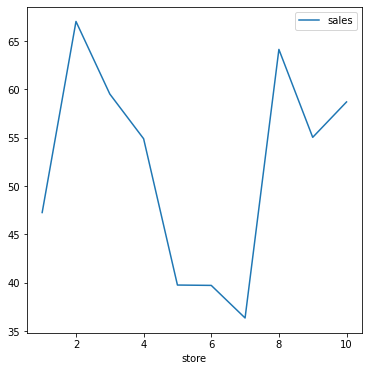

In [73]:
sales_store = pd.pivot_table(df, index = "store", values = "sales")
sales_store.plot(figsize=(6,6))

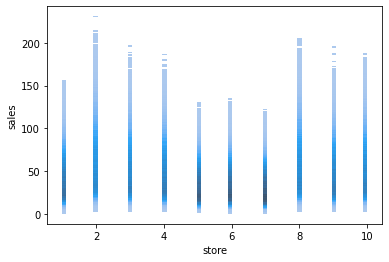

In [74]:
sns.histplot(data = df, x= "store", y = "sales")

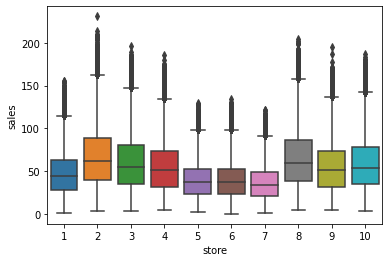

In [75]:
sns.boxplot(data = df, x= "store", y = "sales") 

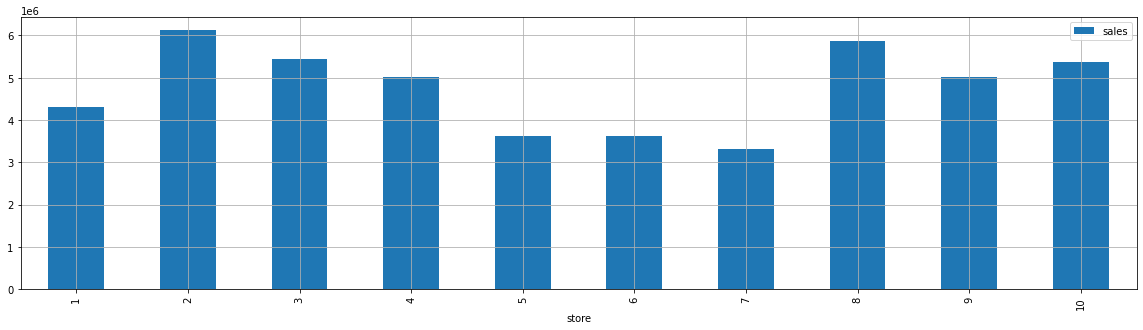

In [76]:
df_store_sales = df.groupby('store').agg({'sales': 'sum'}) #.sort_values(by='sales', ascending=True)

df_store_sales.plot(kind="bar",legend="Sum", figsize=(20,5)).grid()

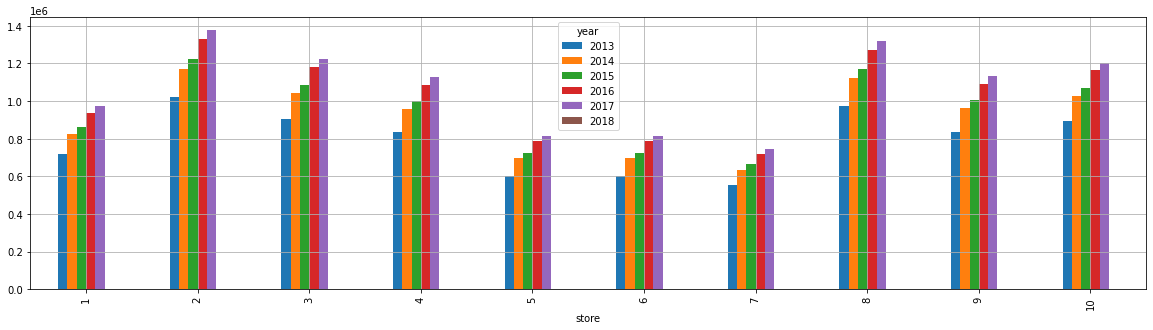

In [80]:
df_sales_store_year = pd.pivot_table(df, index=['store'], columns = ['year'], values='sales', aggfunc=["sum"])


df_sales_store_year["sum"].plot(kind="bar",legend="Sum", figsize=(20,5)).grid()

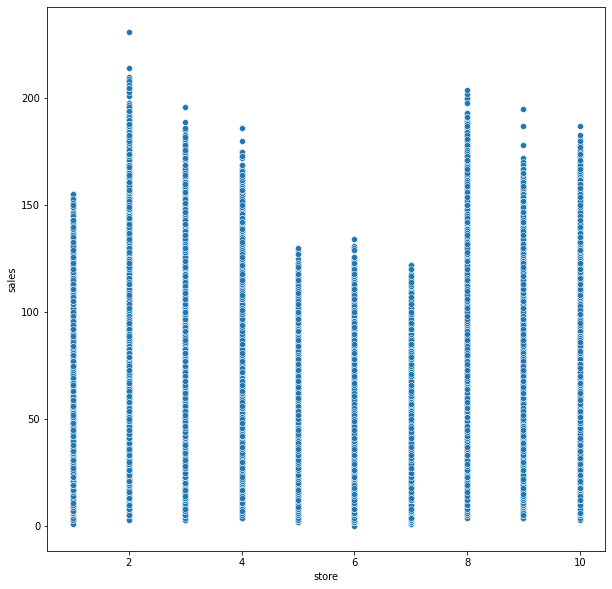

In [96]:
sns.scatterplot(data = df, x='store', y = 'sales') 

In [81]:
df_sales_store_year_top_5 = df.groupby('store').agg({'sales': 'sum'}).sort_values(by='sales', ascending=False)

df_sales_store_year_top_5.head(10)

,sales
store,
2,6120128.0
8,5856169.0
3,5435144.0
10,5360158.0
9,5025976.0
4,5012639.0
1,4315603.0
5,3631016.0
6,3627670.0


#Podemos ver nos gráficos quanto a cima que a loja 2 e a 8 despontam nas vendas e aloja 7 é que tem o pior resultado.

#Agora vamos ver os itens:

In [82]:
# Itens mais vendidos por ano:

df_sales_store_year_item = pd.pivot_table(df, index=['item'], columns = ['year', "store"], values='sales', aggfunc=["sum"])

df_sales_store_year_item.head()

sum                                      ...                         
year      2013                                      ... 2018                    
store       1        2        3        4        5   ...   6    7    8    9    10
item                                                ...                         
1       6025.0   8530.0   7603.0   6973.0   5092.0  ...  0.0  0.0  0.0  0.0  0.0
2      16036.0  22942.0  20210.0  18898.0  13391.0  ...  0.0  0.0  0.0  0.0  0.0
3      10100.0  14165.0  12688.0  11710.0   8540.0  ...  0.0  0.0  0.0  0.0  0.0
4       6045.0   8590.0   7764.0   7076.0   5011.0  ...  0.0  0.0  0.0  0.0  0.0
5       5002.0   7068.0   6270.0   5882.0   4329.0  ...  0.0  0.0  0.0  0.0  0.0

[5 rows x 60 columns]

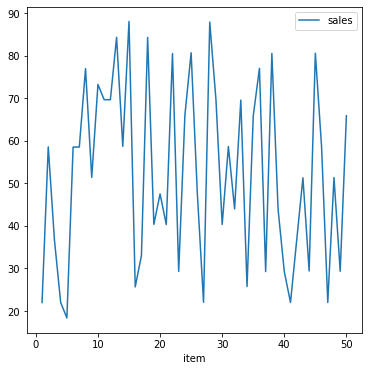

In [85]:
sales_item = pd.pivot_table(df, index = "item", values = "sales")
sales_item.plot(figsize=(6,6))

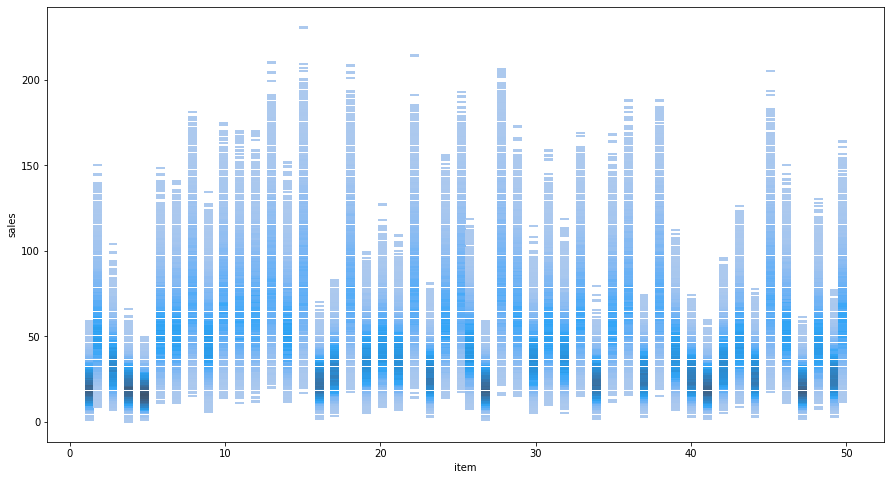

In [92]:
plt.figure(figsize=(15,8))
ax =sns.histplot(data = df, x= "item", y = "sales")

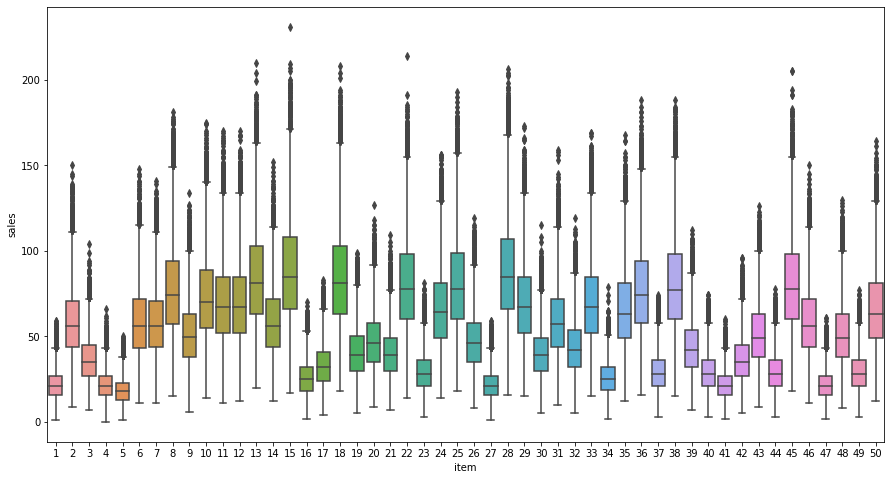

In [91]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data = df, x= "item", y = "sales") 

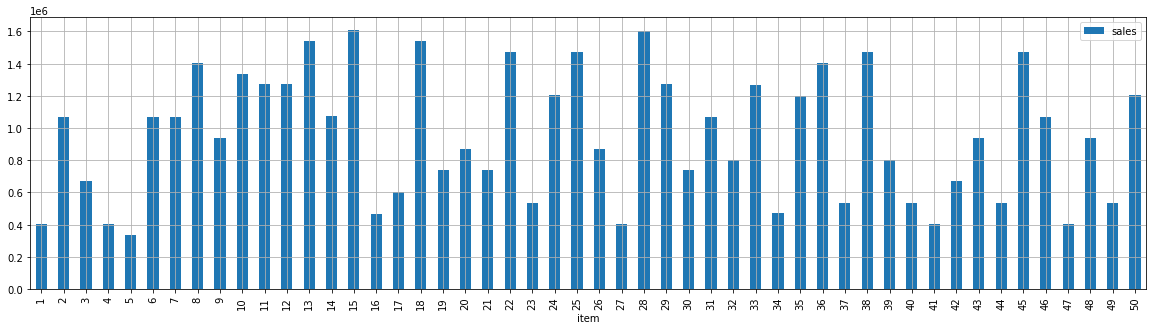

In [93]:
df_itens_sales = df.groupby('item').agg({'sales': 'sum'}) #.sort_values(by='sales', ascending=True)

df_itens_sales.plot(kind="bar",legend="Sum", figsize=(20,5)).grid()

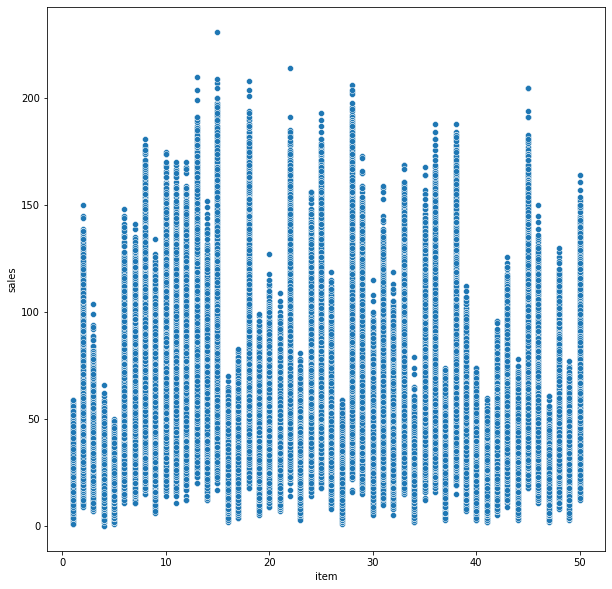

In [95]:
sns.scatterplot(data = df, x='item', y = 'sales') 

In [102]:
df_item_sales_top = df.groupby("item").agg({'sales': 'sum'}).sort_values(by='sales', ascending=False)

df_item_sales_top.head(5)

,sales
item,
15,1607442.0
28,1604713.0
13,1539621.0
18,1538876.0
25,1473334.0


Acima podemos ver os cinco itens mais vendidos são:

15- 1607442, 
28- 1604713,
13- 1539621,
18- 1538876,
25- 1473334.